<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

Note:  This material largely follows the text "Numerical Linear Algebra" by Trefethen and Bau (SIAM, 1997) and is meant as a guide and supplement to the material presented there.

In [1]:
from __future__ import print_function

%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# QR Factorizations and Least Squares

## Projections

A **projector** is a square matrix $P$ that satisfies
$$
    P^2 = P.
$$

Why does this definition make sense?  Why do we require it to be square?

A projector comes from the idea that we want to project a vector $\mathbf{v}$ onto a lower dimensional subspace.  For example, suppose that $\mathbf{v}$ lies completely within the subspace, i.e. $\mathbf{v} \in \text{range}(P)$. If that is the case then $P \mathbf{v}$ should not change, or $P\mathbf{v} = \mathbf{v}$.  This motivates the definition above.

i.e.  if
$$
    P\mathbf{v} = \mathbf{v} 
$$
then
$$
    P( P \mathbf{v} ) = P\mathbf{v} = \mathbf{v}.
$$
or $$P^2 = P$$

Note: 
- Columns of $P$ serve as bases for $\mathbf{v}$?

As another example, take a vector $\mathbf{x} \notin \text{range}(P)$ and project it onto the subspace $P\mathbf{x} = \mathbf{v}$.  If we apply the projection again to $\mathbf{v}$ we now have

$$\begin{aligned}
    P\mathbf{x} &= \mathbf{v}, \\
    P^2 \mathbf{x} & = P \mathbf{v} = \mathbf{v} \\
    \Rightarrow P^2 &= P.
\end{aligned}$$

It is also important to keep in mind the following, given again $\mathbf{x} \notin \text{range}(P)$, if we look at the difference between the projection and the original vector $P\mathbf{x} - \mathbf{x}$ and apply the projection again we have
$$
    P(P\mathbf{x} - \mathbf{x}) = P^2 \mathbf{x} - P\mathbf{x} = 0
$$
which means the difference between the projected vector $P\mathbf{x} = \mathbf{v}$ lies in the null space of $P$, $\mathbf{v} \in \text{null}(P)$.

Note:
- $\mathbf{x}$ is in nullspace of $P$
- Therefore, $P\mathbf{x} = 0$

### Complementary Projectors

A projector also has a complement defined to be $I - P$.  

Show that this complement is also a projector.

We can show that this a projector by examining a repeated application of $(I-P)$:
$$\begin{aligned}
    (I - P)^2 &= I - IP - IP + P^2 \\
    &= I - 2 P + P^2 \\
    &= I - 2P + P \\
    &= I - P.
\end{aligned}$$

It turns out that the complement projects exactly onto $\text{null}(P)$.  

Take 
$$
    \mathbf{x} \in \text{null}(P),
$$ 

then 
$$
    (I - P) \mathbf{x} = \mathbf{x} - P \mathbf{x} = \mathbf{x}
$$ 

since $P \mathbf{x} = 0$ implying that $\mathbf{x} \in \text{range}(I - P)$.

We also know that 
$$
    (I - P) \mathbf{x }\in \text{null}(P)
$$ 
as well.  

This shows that the 
$$
    \text{range}(I - P) \subseteq \text{null}(P)
$$ 
and 
$$
    \text{range}(I - P) \supseteq \text{null}(P)
$$ 
implying that 
$$
    \text{range}(I - P) = \text{null}(P)
$$ 
exactly.  

Reflect on these subspaces and convince yourself that this all makes sense.

This result provides an important property of a projector and its complement, namely that they divide a space into two subspaces whose intersection is 

$$
    \text{range}(I - P) \cap \text{range}(P) = \{0\}
$$

or

$$
    \text{null}(P) \cap \text{range}(P) = \{0\}
$$

These two spaces are called **complementary subspaces**.

Given this property we can take any $P \in \mathbb C^{m \times m}$ which will split $\mathbb C^{m \times m}$ into two subspaces $S$ and $V$, assume that $\mathbf{s}\in S = \text{range}(P)$, and $\mathbf{v} \in V = \text{null}(P)$.  If we have $\mathbf{x} \in \mathbb C^{m \times m}$ that we can split the vector $\mathbf{x}$ into components in $S$ and $V$ by using the projections
$$\begin{aligned}
    P \mathbf{x} = \mathbf{x}_S& &\mathbf{x}_s \in S \\
    (I - P) \mathbf{x} = \mathbf{x}_V& &\mathbf{x}_V \in V
\end{aligned}$$
which we can also observe adds to the original vector as
$$
    \mathbf{x}_S + \mathbf{x}_V = P \mathbf{x} + (I - P) \mathbf{x} = \mathbf{x}.
$$

Try constructing a projection matrix so that $P \in \mathbb R^3$ that projects a vector into one of the coordinate directions ($\mathbb R$).  
 - What is the complementary projector?
 - What is the complementary subspace?

Note:
- Question is asking:
$$
P \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} = \begin{bmatrix} x_1 \\ 0 \\ 0 \end{bmatrix}
$$

### Example:  A non-orthogonal non-linear projector

Given a vector of mols of $N$ chemical components

$$
\mathbf{n} = \begin{bmatrix} n_1 \\ n_2 \\ \vdots \\ n_N\end{bmatrix}
$$
where (e.g. $n_1$ is the number of moles of component $1$) and $n_i\geq 0$

Then we can define the mol fraction  of component $i$ as
$$
    x_i = \frac{n_i}{\mathbf{n}^T\mathbf{1}}
$$  
and the "vector" of mole fractions 
$$
\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_N\end{bmatrix}
$$


In the homework you will show that

* $\mathbf{x}^T\mathbf{1} = 1$ (the sum of the mole fractions add to 1)
* mole fractions do not form a vector space or subspace
* There exists a non Orthogonal projector $f$ such that $f(\mathbf{n})=\mathbf{x}$, $f^2=f$
* $P$ is singular (like all projection matrices) such that if you know the mole-fractions you don't know how many moles you have.
* Find $N(P)$


### Orthogonal Projectors

An **orthogonal projector** is one that projects onto a subspace $S$ that is orthogonal to the complementary subspace $V$ (this is also phrased that $S$ projects along a space $V$).  Note that we are only talking about the subspaces (and their basis), not the projectors!

A **hermitian** matrix is one whose complex conjugate is itself, i.e.

$$
    P = P^\ast.
$$

With this definition we can then say:  *A projector $P$ is orthogonal if and only if $P$ is hermitian.*

**Quick Proof**

Show that if $P^2 = P$ and $P^\ast = P$, then 
$$
\langle P\mathbf{x}, (I-P)\mathbf{x}\rangle=0
$$

### Projection with an Orthonormal Basis

We can also directly construct a projector that uses an orthonormal basis on the subspace $S$.  If we define another matrix $Q \in \mathbb C^{m \times n}$ which is unitary (its columns are orthonormal) we can construct an orthogonal projector as
$$
    P = Q Q^*.
$$
Note that the resulting matrix $P$ is in $\mathbb C^{m \times m}$ as we require.  This means also that the dimension of the subspace $S$ is $n$.

#### Example:  Orthonormal projection and Least-Squares Problems... A review

Consider the overdetermined problem $A\mathbf{x}=\mathbf{b}$ where $A\in\mathbb{R}^{3\times2}$ and $\mathbf{b}\in\mathbb{R}^3$ i.e. 

$$
    \begin{bmatrix} | & | \\
                    \mathbf{a}_1 & \mathbf{a}_2\\
                     | & | \\
     \end{bmatrix} \begin{bmatrix} x_1 \\ x_2\\ \end{bmatrix} 
         = \begin{bmatrix} |   \\
                    \mathbf{b} \\
                     |  \\ 
                     \end{bmatrix}
$$

and $\mathbf{a}_1$, $\mathbf{a}_2$ are linearly independent vectors that span a two-dimensional subspace of $\mathbb{R}^3$.                   

#### Geometry

Geometrically this problem looks like

<img src="./images/least_squares_geometry.jpg" alt="Drawing" width=600/>



Note: 
- $C(A)$ is the columnspace/image of $A$
- Want to find $\hat{\mathbf{x}}$ such that $\left\Vert \mathbf{e} \right\Vert_2$ is minimized
- $\mathbf{a_1}^\top e = 0$ and $\mathbf{a_2}^\top e = 0$ (or $A^\top e = 0$), so $e$ is in left nullspace of $A$
$$
A^\top (\mathbf{b} - \mathbf{p}) = 0 \\
A^\top (\mathbf{b} - A\hat{\mathbf{x}}) = 0 \\
A^\top A \hat{\mathbf{x}} = A^\top \mathbf{b}
$$
- Resolves to normal equations:
$$
\begin{cases}
A\hat{\mathbf{x}} = \mathbf{b} \\
A\hat{\mathbf{x}} = \mathbf{p}
\end{cases}
$$
- If bases are orthogonal ($a_1 = q_1$ and $a_2 = q_2$ are orthogonal)
$$
\begin{align}
    P &= A (A^\top A)^{-1} A^\top \\
    & = Q (Q^\top Q)^{-1} Q^\top \\
    & = QQ^\top \\
    & = QQ^*
\end{align}
$$

If $\mathbf{b}\notin C(A)$, then there is clearly no solution to $A\mathbf{x}=\mathbf{b}$.  However, we can find the point $\mathbf{p}=A\hat{\mathbf{x}}\in C(A)$ that minimizes the length of the the error $\mathbf{e}=\mathbf{b}-\mathbf{p}$.  While we could resort to calculus to find the values of $\hat{\mathbf{x}}$ that minimizes $||\mathbf{e}||_2$.  It should be clear from the figure that the shortest error (in the $\ell_2$ norm) is the one that is perpendicular to every vector in $C(A)$.  

But the sub-space of vectors orthogonal to $C(A)$ is the left-Null Space $N(A^T)$,  and therefore we simply seek solutions of 

\begin{align}
    0 &= A^T\mathbf{e} \\
    &= A^T(\mathbf{b}-\mathbf{p})\\
    &= A^T(\mathbf{b} - A\hat{\mathbf{x}})\\
\end{align}

or we just need to solve the "Normal Equations"  $A^T A\hat{\mathbf{x}} = A^T\mathbf{b}$ for the least-squares solution
$$
    \hat{\mathbf{x}} = \left(A^T A\right)^{-1}A^T\mathbf{b}
$$

if we're actually interested in $\mathbf{p}$ which is the orthogonal projection of $\mathbf{b}$ onto $C(A)$ we get

$$
    \mathbf{p}= A\hat{\mathbf{x}} = A \left(A^T A\right)^{-1}A^T\mathbf{b} = P\mathbf{b}
$$
where
$$
    P = A \left(A^T A\right)^{-1}A^T
$$ 

is an orthogonal projection matrix (verify that $P^2 = P$ and $(I - P)\mathbf{b}\perp P\mathbf{b})$

For a general matrix $A$,  this form of the projection matrix is rather horrid to find,  however,  if the columns of $A$ formed an orthonormal basis for $C(A)$,  i.e. $A=Q$,  then the form of the projection matrix is much simpler as $Q^T Q=I$, therefore

$$
    P = QQ^T
$$

This is actually quite general. Given any orthonormal basis for a vector space $S=\mathrm{span}\langle \mathbf{q}_1,\mathbf{q}_2,\ldots,\mathbf{q}_N\rangle$.  If these vectors form the columns of $Q$,  then the orthogonal projector onto $S$ is always $QQ^T$ and the complement is always $I-QQ^T$.

**Example:  Construction of an orthonormal projector**

Take $\mathbb R^3$ and derive a projector that projects onto the x-y plane and is an orthogonal projector.

the simplest Orthonormal basis for the $x-y$ plane are the columns of 
$$
    Q = \begin{bmatrix} 1 & 0 \\ 
                        0 & 1 \\ 
                        0 & 0 
        \end{bmatrix}
$$
and an orthogonal projector onto the $x-y$ plane is simply
$$ 
    Q Q^\ast = \begin{bmatrix} 1 & 0 \\ 
                               0 & 1 \\ 
                               0 & 0 
               \end{bmatrix} 
               \begin{bmatrix} 1 & 0 & 0 \\
                               0 & 1 & 0 
               \end{bmatrix} = \begin{bmatrix} 
                               1 & 0 & 0 \\
                               0 & 1 & 0 \\ 
                               0 & 0 & 0 
               \end{bmatrix}
$$

In [2]:
Q = numpy.array([[1, 0],[0, 1],[0, 0]])
P = numpy.dot(Q, Q.T)
I = numpy.identity(3)

x = numpy.array([3, 4, 5])
x_S = numpy.dot(P, x)
x_V = numpy.dot(I - P, x)
print(x)
print(x_S)
print(x_V)
print(x_S + x_V)

[3 4 5]
[3 4 0]
[0. 0. 5.]
[3. 4. 5.]


Note:
- Above, $\mathbf{x_S} + \mathbf{x_V} = \mathbf{x}$
- $\mathbf{x_S}$ is projection of $\mathbf{x}$ on columnspace of $P$
- $\mathbf{x_V}$ is complementary projection
- Below approach is more numerically sensible, since matrix multiplication introduces more floating point error than matrix addition/subtraction (check?)


In [3]:
# Numerically more sensible approach
Q = numpy.array([[1, 0],[0, 1],[0, 0]])

x = numpy.array([3, 4, 5])
x_S = Q.dot(Q.T.dot(x))
x_V = x - x_S
print(x)
print(x_S)
print(x_V)
print(x_S + x_V)

[3 4 5]
[3 4 0]
[0 0 5]
[3 4 5]


#### Example: Construction of a projector that eliminates a direction

Goal:  Eliminate the component of a vector in the direction $\mathbf{q}$.

Form the projector $P = \mathbf{q} \mathbf{q}^\ast \in \mathbb C^{m \times m}$.  The complement $I - P$ will then include everything **BUT** that direction.  If $||\mathbf{q}|| = 1$ we can then simply use $I - \mathbf{q} \mathbf{q}^\ast$.  If not we can write the projector in terms of the arbitrary vector $\mathbf{a}$ as
$$
    I - \frac{\mathbf{a} \mathbf{a}^\ast}{||\mathbf{a}||^2} = I - \frac{\mathbf{a} \mathbf{a}^\ast}{\mathbf{a}^\ast \mathbf{a}}
$$
Note that differences in the resulting dimensions between the two values in the fraction.  Also note that as we saw with the outer product, the resulting $\text{rank}(\mathbf{a} \mathbf{a}^\ast) = 1$.

Now again try to construct a projector in $\mathbb R^3$ that projects onto the $x$-$y$ plane.

In [4]:
q = numpy.array([0, 0, 1])
P = numpy.outer(q, q.conjugate())
P_comp = numpy.identity(3) - P

x = numpy.array([3, 4, 5])
print(numpy.dot(P, x))
print(numpy.dot(P_comp, x))

a = numpy.array([0, 0, 3])
P = numpy.outer(a, a.conjugate()) / (numpy.dot(a, a.conjugate()))
P_comp = numpy.identity(3) - P
print(numpy.dot(P, x))
print(numpy.dot(P_comp, x))

[0 0 5]
[3. 4. 0.]
[0. 0. 5.]
[3. 4. 0.]


## Quick Review

* A projection matrix is any square matrix $P$ such that $P^2=P$
* $P$ projects onto a subspace $S=\mathrm{range}(P)$
* The complementary projection matrix $I-P$ projects onto $V=\mathrm{null}(P)$
* An *orthogonal* projector can always be constructed as $P=QQ^T$ where the columns of $Q$ form an *orthonormal* basis for $S$ and $S\perp V$
* Solutions of Least-squares problems $A\mathbf{x}=\mathbf{b}$ are essentially projection problems where we seek to solve $A\mathbf{x}=\mathbf{b}$ where $\mathbf{b}\notin C(A)$

### Solution of Least Squares problems by the Normal Equations

given $A\mathbf{x}=\mathbf{b}$ where $\mathbf{b}\notin C(A)$ we can always solve them using the Normal Equations

$$
A^T A\hat{\mathbf{x}} = A^T\mathbf{b}
$$ 

which actually solves $A\hat{\mathbf{x}} =\mathbf{p}$  where $\mathbf{p}$ is the orthogonal projection of $\mathbf{b}$ onto $C(A)$

* but there is a better way...

### Solution of Least Squares problems by the QR factorization

given any matrix $A$ that is full column rank, we will show that we can always factor it as 

$$
    A=QR
$$

where $Q$ **is a unitary matrix** whose columns form an *orthonormal* basis for $C(A)$,  and $R$ **is an upper triangular matrix** that says how to reconstruct the columns of $A$ from the columns of $Q$

$$
    \begin{bmatrix}  &  &  \\  &  &  \\ \mathbf{a}_1 & \cdots & \mathbf{a}_n \\  &  &  \\  &  &  \end{bmatrix} = 
    \begin{bmatrix}  &  &  \\  &  &  \\ \mathbf{q}_1 & \cdots & \mathbf{q}_n \\  &  &  \\  &  &  \end{bmatrix}
    \begin{bmatrix} r_{11} & r_{12} & \cdots & r_{1n} \\  & r_{22} &  &  \\  &  & \ddots & \vdots \\  &  &  & r_{nn} \end{bmatrix}.
$$
If we write this out as a matrix multiplication we have
$$\begin{aligned}
    \mathbf{a}_1 &= r_{11} \mathbf{q}_1 \\
    \mathbf{a}_2 &= r_{22} \mathbf{q}_2 + r_{12} \mathbf{q}_1 \\
    \mathbf{a}_3 &= r_{33} \mathbf{q}_3 + r_{23} \mathbf{q}_2 + r_{13} \mathbf{q}_1 \\
    &\vdots
\end{aligned}$$

given $A=QR$,  then solving

$$
    A\mathbf{x} = \mathbf{b}
$$

becomes

$$
    QR\mathbf{x} = \mathbf{b}
$$

or since $Q^T Q=I$

$$
    R\mathbf{x} = Q^T\mathbf{b}
$$

which can be **solve quickly by back-substitution as it is a triangular matrix**.

Multiplying both sides by $Q$ again shows that this problem is equivalent to

$$
    QR\mathbf{x} = QQ^T\mathbf{b}
$$

or $A\mathbf{x} = QQ^T\mathbf{b}$ i.e. we are just solving $A\mathbf{x}=\mathbf{p}$ where $\mathbf{p}$ is the orthogonal projection of  $\mathbf{b}$ onto $C(A)$

Note:
- $QQ^\top$ is projection matrix onto $C(A)$. If $Q$ is square, $QQ^\top = I$.

**Question**... how to find $QR$?

## QR Factorization

One of the most important ideas in linear algebra is the concept of factorizing an original matrix into different constituents that may have useful properties.  These properties can help us understand the matrix better and lead to numerical methods.  In numerical linear algebra one of the most important factorizations is the **QR factorization**.  

The basic idea is that we want to break up $A$ into its successive spaces spanned by the columns of $A$.  If we have
$$
    A = \begin{bmatrix}  &  &  \\  &  &  \\ \mathbf{a}_1 & \cdots & \mathbf{a}_n \\  &  &  \\  &  &  \end{bmatrix}
$$
where the columns of $A$ are linearly independent then we want to construct the sequence
$$
    \text{span}(\mathbf{a}_1) \subseteq \text{span}(\mathbf{a}_1, \mathbf{a}_2) \subseteq \text{span}(\mathbf{a}_1, \mathbf{a}_2, \mathbf{a}_3) \subseteq \cdots \subseteq \text{span}(\mathbf{a}_1, \mathbf{a}_2, \ldots , \mathbf{a}_n)
$$
where here $\text{span}(\mathbf{v}_1,\mathbf{v}_2,\ldots,\mathbf{v}_m)$ indicates the subspace spanned by the vectors $\mathbf{v}_1, \mathbf{v}_2, \ldots, \mathbf{v}_m$.  

QR factorization attempts to construct a set of orthonormal vectors $\mathbf{q}_i$ that span each of the subspaces, i.e. 
$$
    \text{span}(\mathbf{a}_1, \mathbf{a}_2, \ldots, \mathbf{a}_j) = \text{span}(\mathbf{q}_1, \mathbf{q}_2, \ldots, \mathbf{q}_j).
$$

Before specifying a general procedure we go through the first few steps of the process to get a feel for what needs to be done. In particular we are given a sequence of vectors, $\mathbf{a_1}$, $\mathbf{a_2}$, $\ldots$, $\mathbf{a_n}$, and generate a sequence of orthonormal vectors  $\mathbf{q}_1$, $\mathbf{q}_2$, $\ldots$, and $\mathbf{q}_n$ whose spans are the same subspace.

First, for $\text{span}(\mathbf{a}_1)$ we can directly use $\mathbf{a}_1$ but normalize the vector such that
$$
    \mathbf{q}_1 = \frac{\mathbf{a}_1}{||\mathbf{a}_1||}.
$$

2. For $\text{span}(\mathbf{a}_1, \mathbf{a}_2)$ we already have $\mathbf{q}_1$ so we need to have a vector $\mathbf{q}_2$ that is orthogonal to $\mathbf{q}_1$, i.e.
$$
    \langle \mathbf{q}_1, \mathbf{q}_2 \rangle = \mathbf{q}_1^\ast \mathbf{q}_2 = 0
$$
and is again normalized.  We can accomplish this by modifying $\mathbf{a}_2$ such that
$$
    \mathbf{q}_2 = \frac{\mathbf{a}_2 - \langle \mathbf{q}_1, \mathbf{a}_2\rangle \mathbf{q}_1}{||\mathbf{a}_2 - \langle \mathbf{q}_1, \mathbf{a}_2\rangle\mathbf{q}_1||}.
$$
which we can show is orthogonal to $\mathbf{q}_1$ as
$$\begin{aligned}
    \langle \mathbf{q}_1, \mathbf{q}_2 \rangle &= \left(\langle  \mathbf{q}_1, \mathbf{a}_2 - \langle  \mathbf{q}_1, \mathbf{a}_2 \rangle\mathbf{q}_1 \rangle \right) \frac{1}{||\mathbf{a}_2 - \langle  \mathbf{q}_1, \mathbf{a}_2 \rangle \mathbf{q}_1||} \\
    &= \left(\langle  \mathbf{q}_1, \mathbf{a}_2 \rangle - \langle  \mathbf{q}_1, \mathbf{a}_2 \rangle\langle\mathbf{q}_1,\mathbf{q}_1\rangle\right) \frac{1}{||\mathbf{a}_2 - \langle  \mathbf{q}_1, \mathbf{a}_2 \rangle \mathbf{q}_1||} \\
    &= \left(\langle  \mathbf{q}_1, \mathbf{a}_2 \rangle - \langle  \mathbf{q}_1, \mathbf{a}_2 \rangle\right) \frac{1}{||\mathbf{a}_2 - \langle  \mathbf{q}_1, \mathbf{a}_2 \rangle \mathbf{q}_1||} \\
    &= 0.
\end{aligned}$$

Note:
- If columns of $A$ are not all linearly independent, the non-independent columns orthgonal $\mathbf{q}$ will be $0$.

These results suggest then that we may have a matrix factorization that has the following form:
$$
    \begin{bmatrix}  &  &  \\  &  &  \\ \mathbf{a}_1 & \cdots & \mathbf{a}_n \\  &  &  \\  &  &  \end{bmatrix} = 
    \begin{bmatrix}  &  &  \\  &  &  \\ \mathbf{q}_1 & \cdots & \mathbf{q}_n \\  &  &  \\  &  &  \end{bmatrix}
    \begin{bmatrix} r_{11} & r_{12} & \cdots & r_{1n} \\  & r_{22} &  &  \\  &  & \ddots & \vdots \\  &  &  & r_{nn} \end{bmatrix}.
$$
If we write this out as a matrix multiplication we have
$$\begin{aligned}
    \mathbf{a}_1 &= r_{11} \mathbf{q}_1 \\
    \mathbf{a}_2 &= r_{22} \mathbf{q}_2 + r_{12} \mathbf{q}_1 \\
    \mathbf{a}_3 &= r_{33} \mathbf{q}_3 + r_{23} \mathbf{q}_2 + r_{13} \mathbf{q}_1 \\
    &\vdots
\end{aligned}$$

We can also identify at least the first couple of values of $\mathbf{r}$ as
$$\begin{aligned}
    r_{11} &= \left \Vert \mathbf{a}_1 \right \Vert \\
    r_{12} &= \langle \mathbf{q}_1, \mathbf{a}_2 \rangle \\
    r_{22} &= \left \Vert \mathbf{a}_2 - r_{12} \mathbf{q}_1 \right \Vert
\end{aligned}$$
It turns out we can generalize this as Gram-Schmidt orthogonalization.

### Gram-Schmidt Orthogonalization

As may have been suggestive we can directly construct the arrays $Q$ and $R$ via a process of successive orthogonalization.  We have already shown the first two iterations so lets now consider the $j$th iteration.  

We want to subtract off the components of the vector $\mathbf{a}_j$ in the direction of the $\mathbf{q}_i$ vectors where $i=1,\ldots,j-1$.  This suggests that we define a vector $\mathbf{v}_j$ such that
$$\begin{aligned}
    \mathbf{v}_j &= \mathbf{a}_j - \langle \mathbf{q}_1, \mathbf{a}_j \rangle \mathbf{q}_1 - \langle \mathbf{q}_2, \mathbf{a}_j \rangle \mathbf{q}_2 - \quad \cdots \quad- \langle \mathbf{q}_{j-1}, \mathbf{a}_j \rangle \mathbf{q}_{i-1} \\
    &= \mathbf{a}_j - \sum^{j-1}_{i=1} \langle \mathbf{q}_i, \mathbf{a}_j \rangle \mathbf{q}_i.
\end{aligned}$$

We also need to normalize $\mathbf{v}_j$ which allows to define the $j$th column of $Q$ as
$$
    \mathbf{q}_j = \frac{\mathbf{a}_j - \sum^{j-1}_{i=1} \langle \mathbf{q}_i, \mathbf{a}_j \rangle \mathbf{q}_i}{\left \Vert \mathbf{a}_j - \sum^{j-1}_{i=1} \langle \mathbf{q}_i, \mathbf{a}_j \rangle \mathbf{q}_i \right \Vert}.
$$

Note:
- Can turn out unstable. There's another way called **modified Gram-Schmidt**

We can also discern what the entries of $R$ are as we can write the matrix multiplication as the sequence
$$\begin{aligned}
    \mathbf{q}_1 &= \frac{\mathbf{a}_1}{r_{11}} \\
    \mathbf{q}_2 &= \frac{\mathbf{a}_2 - r_{12} \mathbf{q}_1}{r_{22}} \\
    \mathbf{q}_3 &= \frac{\mathbf{a}_3 - r_{13} \mathbf{q}_1 - r_{23} \mathbf{q}_2}{r_{33}} \\
    &\vdots \\
    \mathbf{q}_n &= \frac{\mathbf{a}_n - \sum^{n-1}_{i=1} r_{in} \mathbf{q}_i}{r_{nn}}
\end{aligned}$$
leading us to define
$$
    r_{ij} = \left \{ \begin{aligned}
        &\langle \mathbf{q}_i, \mathbf{a}_j \rangle & &i \neq j \\
        &\left \Vert \mathbf{a}_j - \sum^{j-1}_{i=1} r_{ij} \mathbf{q}_i \right \Vert & &i = j
    \end{aligned} \right .
$$

This is called the **classical Gram-Schmidt** iteration.  Turns out that the procedure above is unstable because of rounding errors introduced.

In [5]:
# Implement Classical Gram-Schmidt Iteration
def classic_GS(A):
    m = A.shape[0]
    n = A.shape[1]
    Q = numpy.empty((m, n))
    R = numpy.zeros((n, n))
    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = numpy.dot(Q[:, i].conjugate(), A[:, j])
            v = v - R[i, j] * Q[:, i]
        R[j, j] = numpy.linalg.norm(v, ord=2)
        Q[:, j] = v / R[j, j]
    return Q, R

In [6]:
A = numpy.array([[12, -51, 4], [6, 167, -68], [-4, 24, -41]], dtype=float)
Q, R = classic_GS(A)
print(A)
print(Q)
print(numpy.dot(Q.transpose(), Q))
print(R)
print(numpy.dot(Q, R) - A)

[[ 12. -51.   4.]
 [  6. 167. -68.]
 [ -4.  24. -41.]]
[[ 0.85714286 -0.39428571 -0.33142857]
 [ 0.42857143  0.90285714  0.03428571]
 [-0.28571429  0.17142857 -0.94285714]]
[[ 1.00000000e+00 -4.18882616e-17 -8.63255046e-17]
 [-4.18882616e-17  1.00000000e+00 -8.63481622e-17]
 [-8.63255046e-17 -8.63481622e-17  1.00000000e+00]]
[[ 14.  21. -14.]
 [  0. 175. -70.]
 [  0.   0.  35.]]
[[ 0.00000000e+00 -7.10542736e-15  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.42108547e-14]
 [ 0.00000000e+00  3.55271368e-15  0.00000000e+00]]


#### Full vs. Reduced QR

If the original matrix $A \in \mathbb C^{m \times n}$ where $m \ge n$ then we can still define a QR factorization, called the **full QR factorization**, which appends columns full of zeros to $R$ to reproduce the full matrix.
$$
    A = Q R = \begin{bmatrix} Q_1 & Q_2 \end{bmatrix} 
              \begin{bmatrix} R_1 \\
                              0 
              \end{bmatrix} = Q_1 R_1
$$
The factorization $Q_1 R_1$ is called the **reduced** or **thin QR factorization** of $A$.

We require that the additional columns added $Q_2$ are an orthonormal basis that is orthogonal itself to $\text{range}(A)$.  If $A$ is full ranked then $Q_1$ and $Q_2$ provide a basis for $\text{range}(A)$ and $\text{null}(A^\ast)$ respectively.

Note:
- $\begin{bmatrix} Q_1 & Q_2 \end{bmatrix}$ is a square matrix
- Only care about $Q_1$ mostly

#### QR Existence and Uniqueness
Two important theorems exist regarding this algorithm which we state without proof:

1. *Every $A \in \mathbb C^{m \times n}$ with $m \geq n$ has a full QR factorization and therefore a reduced QR factorization.*

2. *Each $A \in \mathbb C^{m \times n}$ with $m \geq n$ of full rank has a unique reduced QR factorization $A = QR$ with $r_{jj} > 0$.*

#### Gram-Schmidt in Terms of Projections

To start lets rewrite classical Gram-Schmidt as a series of projections:
$$
    \mathbf{q}_1 = \frac{P_1 \mathbf{a}_1}{||P_1 \mathbf{a}_1||}, \quad \mathbf{q}_2 = \frac{P_2 \mathbf{a}_2}{||P_2 \mathbf{a}_2||}, \quad \cdots \quad \mathbf{q}_n = \frac{P_n \mathbf{a}_n}{||P_n \mathbf{a}_n||}
$$
where the $P_i$ are orthogonal projectors onto the $\mathbf{q}_1, \mathbf{q}_2, \ldots, \mathbf{q}_{i-1}$, in other words the complement of $\text{span}(\mathbf{a}_1, \mathbf{a}_2, \ldots, \mathbf{a}_{i-1})$.

How should we construct these projectors?

We saw before that we can easily construct an orthogonal projector onto the complement of a space by first constructing the projector onto the space itself via
$$
    \hat{\!Q}_{i-1} = \begin{bmatrix}
           &    &       &        \\
           &    &       &        \\
        \mathbf{q}_1 & \mathbf{q}_2 & \cdots & \mathbf{q}_{i-1} \\ 
           &    &       &        \\
           &    &       &       
    \end{bmatrix}.
$$
Constructing the projection onto the space spanned by $\mathbf{q}_1$ through $\mathbf{q}_{i-1}$ is then
$$
    \hat{\!P}_{i-1} = \hat{\!Q}_{i-1} \hat{\!Q}^\ast_{i-1}
$$
and therefore the projections in Gram-Schmidt orthogonalization is
$$
    P_{i} = I - \hat{\!P}_{i-1} = I - \hat{\!Q}_{i-1} \hat{\!Q}^\ast_{i-1}.
$$

#### Modified Gram-Schmidt

One problem with the original Gram-Schmidt algorithm is it is not stable numerically.  Instead we can derive a modified method that is more numerically stable.

Recall that the basic piece of the original algorithm was to take the inner product of $\mathbf{a}_j$ and all the relevant $\mathbf{q}_i$.  Using the rewritten version of Gram-Schmidt in terms of projections we then have

$$
    \mathbf{v}_i = P_i \mathbf{a}_i.
$$

This projection is of rank $m - (i - 1)$ as we know that the resulting $\mathbf{v}_i$ are linearly independent by construction.  The modified version of Gram-Schmidt instead uses projections that are all of rank $m-1$.  To construct this projection remember that we can again construct the complement to a projection and perform the following sequence of projections

$$
    P_i = \hat{\!P}_{\mathbf{q}_{i-1}} \hat{\!P}_{\mathbf{q}_{i-2}} \cdots \hat{\!P}_{\mathbf{q}_{2}} \hat{\!P}_{\mathbf{q}_{1}}
$$

where $\hat{\!P}_{\mathbf{q}_{i}}$ projects onto the complement of the space spanned by $\mathbf{q}_i$.  Note that this performs mathematically the same job as $P_i \mathbf{a}_i$ however each of these projectors are of rank $m - 1$.  

This leads to the following set of calculations:

$$\begin{aligned}
    1.\quad \mathbf{v}^{(1)}_i &= \mathbf{a}_i  \\
    2.\quad \mathbf{v}^{(2)}_i &= \hat{\!P}_{\mathbf{q}_1} \mathbf{v}_i^{(1)} = \mathbf{v}^{(1)}_i - \mathbf{q}_1 q_1^\ast \mathbf{v}^{(1)}_i \\
    3.\quad \mathbf{v}^{(3)}_i &= \hat{\!P}_{\mathbf{q}_2} \mathbf{v}_i^{(2)} = \mathbf{v}^{(2)}_i - \mathbf{q}_2 \mathbf{q}_2^\ast \mathbf{v}^{(2)}_i \\
    & \text{  } \vdots & &\\
    i.\quad \mathbf{v}^{(i)}_i &= \hat{\!P}_{\mathbf{q}_{i-1}} \mathbf{v}_i^{(i-1)} =  \mathbf{v}_i^{(i-1)} - \mathbf{q}_{i-1} \mathbf{q}_{i-1}^\ast \mathbf{v}^{(i-1)}_i
\end{aligned}$$

The reason why this approach is more stable is that we are not projecting with a possibly arbitrarily low-rank projector, instead we only take projectors that are high-rank.

**Example: Implementation of modified Gram-Schmidt**
Implement the modified Gram-Schmidt algorithm checking to make sure the resulting factorization has the required properties.

In [7]:
# Implement Modified Gram-Schmidt Iteration
def mod_GS(A):
    m = A.shape[0]
    n = A.shape[1]
    Q = numpy.empty((m, n))
    R = numpy.zeros((n, n))
    v = A.copy()
    for i in range(n):
        R[i, i] = numpy.linalg.norm(v[:, i], ord=2)
        Q[:, i] = v[:, i] / R[i, i]
        for j in range(i + 1, n):
            R[i, j] = numpy.dot(Q[:, i].conjugate(), v[:, j])
            v[:, j] -= R[i, j] * Q[:, i]
    return Q, R

In [8]:
A = numpy.array([[12, -51, 4], [6, 167, -68], [-4, 24, -41]], dtype=float)
print(A)
Q, R = mod_GS(A)
print(R)
print(numpy.dot(Q.transpose(), Q))
print("Modified = ")
print(numpy.dot(Q, R) - A)

[[ 12. -51.   4.]
 [  6. 167. -68.]
 [ -4.  24. -41.]]
[[ 14.  21. -14.]
 [  0. 175. -70.]
 [  0.   0.  35.]]
[[ 1.00000000e+00 -4.18882616e-17 -3.08143533e-17]
 [-4.18882616e-17  1.00000000e+00 -5.30437372e-16]
 [-3.08143533e-17 -5.30437372e-16  1.00000000e+00]]
Modified = 
[[ 0.00000000e+00 -7.10542736e-15  8.88178420e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  3.55271368e-15  0.00000000e+00]]


### Householder Triangularization

**Gram-Schmidt triangularization**

One way to also interpret Gram-Schmidt orthogonalization is as a series of multiplications by upper triangular matrices of the matrix A.  For instance the first step in performing the modified algorithm is to divide through by the norm $r_{11} = ||v_1||$ to give $q_1$:

$$
    \begin{bmatrix}
           &    &       &  \\
           &    &       &  \\
        \mathbf{v}_1 & \mathbf{v}_2 & \mathbf{v}_3 &  \cdots & \mathbf{v}_n \\
           &    &       &  \\
           &    &       &       
    \end{bmatrix}
    \begin{bmatrix}
        \frac{1}{r_{11}}   &  &\cdots &       \\
           & 1  &          \\
         &  & \ddots &  \\ 
           &    &  & 1 
    \end{bmatrix} = 
    \begin{bmatrix}
           &    &       &        \\
           &    &       &        \\
        \mathbf{q}_1 & \mathbf{v}_2 &  \mathbf{v}_3 & \cdots & \mathbf{v}_n \\ 
           &    &       &        \\
           &    &       &       
    \end{bmatrix}
$$

We can also perform all the step (2) evaluations by also combining the step that projects onto the complement of $q_1$ by add the appropriate values to the entire first row:

$$
    \begin{bmatrix}
           &    &       &  \\
           &    &       &  \\
        \mathbf{v}_1 & \mathbf{v}_2 &  \mathbf{v}_3 & \cdots & \mathbf{v}_n \\
           &    &       &  \\
           &    &       &       
    \end{bmatrix}
    \begin{bmatrix}
        \frac{1}{r_{11}}   & -\frac{r_{12}}{r_{11}} & -\frac{r_{13}}{r_{11}} & \cdots      \\
           & 1   &         \\
         &  & \ddots &  \\ 
           &    &  & 1 
    \end{bmatrix} = 
    \begin{bmatrix}
           &    &       &        \\
           &    &       &        \\
        \mathbf{q}_1 & \mathbf{v}_2^{(2)} & \mathbf{v}_3^{(2)} & \cdots & \mathbf{v}_n^{(2)} \\ 
           &    &       &        \\
           &    &       &       
    \end{bmatrix}
$$

The next step can then be placed into the second row:
$$
    \begin{bmatrix}
           &    &       &  \\
           &    &       &  \\
        \mathbf{v}_1 & \mathbf{v}_2 & \mathbf{v}_3 & \cdots & \mathbf{v}_n \\
           &    &       &  \\
           &    &       &       
    \end{bmatrix}
    \cdot R_1 \cdot
    \begin{bmatrix}
        1 &  &  &  & \\
         & \frac{1}{r_{22}}   & -\frac{r_{23}}{r_{22}} & -\frac{r_{25}}{r_{22}} & \cdots      \\
         &   & 1   &         \\
         &  &  & \ddots &  \\ 
         &    &  & & 1 
    \end{bmatrix} = 
    \begin{bmatrix}
           &    &       &        \\
           &    &       &        \\
        \mathbf{q}_1 & \mathbf{q}_2 & \mathbf{v}_3^{(3)} & \cdots & \mathbf{v}_n^{(3)} \\ 
           &    &       &        \\
           &    &       &       
    \end{bmatrix}
$$

If we identify the matrices as $R_1$ for the first case, $R_2$ for the second case and so on we can write the algorithm as

$$
    A \underbrace{R_1R_2 \quad \cdots \quad R_n}_{\hat{R}^{-1}} = \hat{\!Q}.
$$

This view of Gram-Schmidt is called **Gram-Schmidt triangularization**.

**Householder triangularization** is similar in spirit.  Instead of multiplying $A$ on the right Householder multiplies $A$ on the left by unitary matrices $Q_k$.  Remember that a unitary matrix (or an orthogonal matrix when strictly real) has as its inverse its adjoint (transpose when real) $Q^* = Q^{-1}$ so that $Q^* Q = I$.  We therefore have

$$
    Q_n Q_{n-1} \quad \cdots \quad Q_2 Q_1 A = R
$$

which if we identify $Q_n Q_{n-1} \text{  } \cdots \text{  } Q_2 Q_1 = Q^*$ and note that if $Q = Q^\ast_n Q^\ast_{n-1} \text{  } \cdots \text{  } Q^\ast_2 Q^\ast_1$ then $Q$ is also unitary.  

We can then write this as
$$\begin{aligned}
    Q_n Q_{n-1} \text{  } \cdots \text{  } Q_2 Q_1 A &= R \\
    Q_{n-1} \cdots Q_2 Q_1 A &= Q^\ast_n R \\
    & \text{  } \vdots \\
    A &= Q^\ast_1 Q^\ast_2 \text{  } \cdots \text{  } Q^\ast_{n-1} Q^\ast_n R \\
    A &= Q R
\end{aligned}$$

Note:
- Unitary matrices ($Q$) do not change the lengths of vectors, so they are numerically stable

This was we can think of Householder triangularization as one of introducing zeros into $A$ via orthogonal matrices.

$$
    \begin{bmatrix}
        \text{x} & \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x} \\
    \end{bmatrix} \overset{Q_1}{\rightarrow}
    \begin{bmatrix}
        \text{x} & \text{x} & \text{x} \\
        0 & \text{x} & \text{x} \\
        0 & \text{x} & \text{x} \\
        0 & \text{x} & \text{x} \\
    \end{bmatrix} \overset{Q_2}{\rightarrow}
    \begin{bmatrix}
        \text{x} & \text{x} & \text{x} \\
        0 & \text{x} & \text{x} \\
        0 & 0 & \text{x} \\
        0 & 0 & \text{x} \\
    \end{bmatrix} \overset{Q_3}{\rightarrow}
    \begin{bmatrix}
        \text{x} & \text{x} & \text{x} \\
        0 & \text{x} & \text{x} \\
        0 & 0 & \text{x} \\
        0 & 0 & 0\\
    \end{bmatrix}
$$

Now the question is how do we construct the $Q_k$.  The construction is usually broken down into a matrix of the form

$$
    Q_k = \begin{bmatrix} I & 0 \\ 0 & F \end{bmatrix}
$$

where $I \in \mathbb C^{k-1 \times k-1}$ identity matrix and $F \in \mathbb C^{m - (k - 1) \times m - (k-1)}$ unitary matrix.  Note that this will leave the rows and columns we have already worked on alone and be unitary.  

We now turn to the task of constructing the matrix $F$. Note that the definition of $Q_k$ implies that
$$
\begin{align}
Q_k \mathbf{x} &= \begin{bmatrix} I & 0 \\ 0 & F \end{bmatrix} \mathbf{x} 
     &= \begin{bmatrix} I & 0 \\ 0 & F \end{bmatrix} 
     \begin{bmatrix} \mathbf{x}_{top} \\ \mathbf{x}_{bottom} \end{bmatrix} \\
     &= \begin{bmatrix} \mathbf{x}_{top} \\ F\mathbf{x}_{bottom}  \end{bmatrix}. \\
\end{align}
$$
The vectors $\mathbf{x}_{top}$ and $\mathbf{x}_{bottom}$ are defined to be
$$
\begin{align}
     \mathbf{x}_{top} &= \begin{bmatrix} x_1  \\  x_2 \\ \vdots \\ x_{k-1}\end{bmatrix} \\
     \mathbf{x}_{bottom} &= \begin{bmatrix} x_k \\ x_{k+1} \\ \vdots \\ x_n \end{bmatrix} \\
\end{align}
$$
The task is to construct the matrix $F$ so that after multiplying, $F\mathbf{x}_{bottom}$  results in a vector that has some nonzero number in the top position and the rest of the numbers are all zeroes. 

One way to think of this operation is to consider the transformation that reflects the vector $x$ over the plane $H$ so that $F x = v = ||x|| \hat{e}_1$:
![Householder reflection](./images/householder.png)
or mathematically
$$
    \mathbf{x} = \begin{bmatrix}
        x_1 \\
        x_2 \\
        \vdots \\
        x_{n} 
     \end{bmatrix} \overset{F}{\rightarrow}
    F\mathbf{x} = \begin{bmatrix}
        ||\mathbf{x}|| \\
        0 \\
        \vdots \\
        0
    \end{bmatrix} = ||\mathbf{x}|| \hat{e}_1.
$$
The unit vector $\hat{e}_1$ is defined to be 
$$
\hat{x} = \begin{bmatrix}
        1 \\
        0 \\
        \vdots \\
        0
    \end{bmatrix}.
$$   

This is of course the effect on only one vector.  Any other vector will be reflected across $H$ (technically a hyperplane) which is orthogonal to $v = ||\mathbf{x}|| \hat{e}_1 - \mathbf{x}$.  This has a similar construction as to the projector complements we were working with before.  Consider the projector defined as

$$
    P x = \left (I - \frac{\mathbf{v} \mathbf{v}^\ast}{\mathbf{v}^\ast \mathbf{v}}\right) \mathbf{x} = \mathbf{x} - \mathbf{x} \left(\frac{\mathbf{v}^\ast \mathbf{x}}{\mathbf{v}^\ast \mathbf{v}} \right),
$$

the complement of a projection in the direction of the vector $\mathbf{v}$, in other words in the direction of $H$ above.  Since we actually want to transform $\mathbf{x}$ to lie in the direction of $\hat{e}_1$ we need to go twice as far as just the projection onto $H$.  This allows us to identify the matrix $F$ as

$$
    F = I - 2 \frac{\mathbf{v} \mathbf{v}^\ast}{\mathbf{v}^\ast \mathbf{v}}.
$$

There is actually a non-uniqueness to which direction we reflect over since another definition of $\hat{H}$ which is orthogonal to the one we originally choose is available.  For numerical stability purposes we will choose the reflector that is the most different from $\mathbf{x}$.  This comes back to having difficulties numerically when the vector $\mathbf{x}$ is nearly aligned with $\hat{e}_1$ and therefore one of the $H$ specification.  By convention the $\mathbf{v}$ chosen is defined by

$$
    v = \text{sign}(\mathbf{x}_1)||\mathbf{x}|| \hat{e}_1 + \mathbf{x}.
$$

In [9]:
# Implementation of Householder QR Factorization
def householder_QR(A, verbose=False):
    R = A.copy()
    v = numpy.empty(A.shape)
    m, n = A.shape
    for k in range(n):
        x = R[k:, k]
        e1 = numpy.zeros(x.shape)
        e1[0] = 1.0
        v[k:, k] = numpy.sign(x[0]) * numpy.linalg.norm(x, ord=2) * e1 + x
        v[k:, k] = v[k:, k] / numpy.linalg.norm(v[k:, k], ord=2)
        #FIXME:  What's wrong with the next line?
        R[k:, k:] -= 2.0 * numpy.dot(numpy.outer(v[k:, k], v[k:, k]), R[k:, k:])



    # Form Q
    m, n = A.shape
    Q = numpy.zeros(A.shape)
    for i in range(n):
        en = numpy.zeros(m)
        en[i] = 1.0
        for j in range(n - 1, -1, -1):
            en[j:m] -= 2.0 * numpy.dot(numpy.outer(v[j:, j], v[j:, j]), en[j:m])
        Q[:, i] = en
        
    return Q, R

A = numpy.array([[12, -51, 4], [6, 167, -68], [-4, 24, -41]], dtype=float)
print("Matrix A = ")
print(A)
m, n = A.shape
Q, R = householder_QR(A, verbose=False)
print("Householder (reduced) Q = ")
print(Q)
print("Householder (full) R = ")
print(R)

print("Check to see if factorization worked...")
print(numpy.abs(A - numpy.dot(Q, R[:n, :n])))

Matrix A = 
[[ 12. -51.   4.]
 [  6. 167. -68.]
 [ -4.  24. -41.]]
Householder (reduced) Q = 
[[-0.85714286  0.39428571 -0.33142857]
 [-0.42857143 -0.90285714  0.03428571]
 [ 0.28571429 -0.17142857 -0.94285714]]
Householder (full) R = 
[[-1.4000000e+01 -2.1000000e+01  1.4000000e+01]
 [ 8.8817842e-16 -1.7500000e+02  7.0000000e+01]
 [-4.4408921e-16  0.0000000e+00  3.5000000e+01]]
Check to see if factorization worked...
[[1.77635684e-15 3.55271368e-14 1.19904087e-14]
 [8.88178420e-16 8.52651283e-14 4.26325641e-14]
 [4.44089210e-16 3.55271368e-15 0.00000000e+00]]


In the above algorithm we do not need to explicitly form the matrix $Q$ to save memory and computation.  If we wanted to for instance solve $A \mathbf{x} = \mathbf{b}$ we again have

$$\begin{aligned}
    A \mathbf{x} &= \mathbf{b} \\
    Q R \mathbf{x} &= \mathbf{b} \\
    R\mathbf{x} &= Q^\ast \mathbf{b}.
\end{aligned}$$

This requires then the multiplication $Q^\ast \mathbf{b}$.  To do this we just need to recognize that the vectors $\mathbf{v}$ we save specify the $Q_k$ so we can form the matrices $F$ and multiply the vector directly with the $\mathbf{v}_k$s:

#### Example 1:   Random Matrix QR

Consider a matrix $A$ with a random eigenspace and widely varying eigenvalues.  The values along the diagonal of $R$ gives us some idea of the size of the projections as we go, i.e. the larger the values the less effective we are in constructing othorgonal directions.

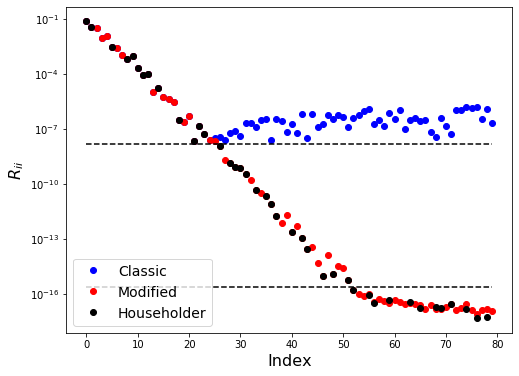

In [10]:
N = 80
# construct a random matrix with known singular values
U, X = numpy.linalg.qr(numpy.random.random((N, N)))
V, X = numpy.linalg.qr(numpy.random.random((N, N)))
S = numpy.diag(2.0**numpy.arange(-1.0, -(N + 1), -1.0))
A = numpy.dot(U, numpy.dot(S, V))

fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)
Q, R = classic_GS(A)
axes.semilogy(numpy.diag(R), 'bo', label="Classic")
Q, R = mod_GS(A)
axes.semilogy(numpy.diag(R), 'ro', label="Modified")
Q, R = householder_QR(A)
axes.semilogy(numpy.diag(R), 'ko', label="Householder")

axes.set_xlabel("Index", fontsize=16)
axes.set_ylabel("$R_{ii}$", fontsize=16)
axes.legend(loc=3, fontsize=14)
axes.plot(numpy.arange(0, N), numpy.ones(N) * numpy.sqrt(numpy.finfo(float).eps), 'k--')
axes.plot(numpy.arange(0, N), numpy.ones(N) * numpy.finfo(float).eps, 'k--')

plt.show()

#### Example 2:  Comparing Orthogonality

Consider
$$
    A = \begin{bmatrix}
        0.70000 & 0.70711 \\ 0.70001 & 0.70711
    \end{bmatrix}.
$$
Check that the matrix $Q$ is really unitary given this matrix.

In [13]:
%precision 16

A = numpy.array([[0.7, 0.70711], [0.70001, 0.70711]])

Q, R = classic_GS(A)
print("Classic: ", numpy.linalg.norm(numpy.dot(Q.transpose(), Q) - numpy.eye(2)))

Q, R = mod_GS(A)
print("Modified: ", numpy.linalg.norm(numpy.dot(Q.transpose(), Q) - numpy.eye(2)))

Q, R = householder_QR(A)
print("Householder:", numpy.linalg.norm(numpy.dot(Q.transpose(), Q) - numpy.eye(2)))

Q, R = numpy.linalg.qr(A)
print("Numpy: ", numpy.linalg.norm(numpy.dot(Q.transpose(), Q) - numpy.eye(2)))

Classic:  3.254726094493924e-11
Modified:  3.254726094493924e-11
Householder: 1.111052298468932e-16
Numpy:  2.3411870786352597e-16


### Applications of QR

#### Solving $A\mathbf{x} = \mathbf{b}$ with QR

Suppose we want to solve the system $A\mathbf{x} = \mathbf{b}$ where $A \in \mathbb C^{m \times m}$.  See if you can figure out how to use a QR factorization to help with this.

Say we have found the QR factorization of $A$, then
$$\begin{aligned}
    A \mathbf{x} &= \mathbf{b} \\
    QR \mathbf{x} & = \mathbf{b} \\
    Q^\ast Q R \mathbf{x} &= Q^\ast \mathbf{b} \\
    R \mathbf{x} &= Q^\ast \mathbf{b}.
\end{aligned}$$
Given that $R$ is upper triangular we can use back-substitution to find $\mathbf{b}$.

#### Applications: Least Squares Problems

Least squares problems have already been introduced but lets consider how our QR factorizations might help us.  As before the least squares problem is characterized by wanting to find the $\mathbf{b}$ such that $||\mathbf{b} - A\mathbf{x}||_2$ is minimized over $\mathbf{x} \in \mathbb C^n$.  

Since we are using the $\ell_2$ norm and know this is equivalent to the Euclidean norm we know that there is a geometric interpretation to this goal, find the vector $\mathbf{x}$ that gives the minimum distance between the vector $\mathbf{b}$ and $A \mathbf{x}$.  This can be interpreted as a projection:
![Least-Squares Projection](./images/lsq_projection.png)
where
$$
    \mathbf{r} = \mathbf{b} - A\mathbf{x}
$$
and
$$
    \mathbf{y} = A\mathbf{x} = P\mathbf{b}.
$$
The vector $\mathbf{r}$ is called the residual (and the thing we are trying to minimize).  $P$ represents the orthogonal projector onto the $\text{range}(A)$.

QR factorization plays a role similar to the ideas we saw from Householder triangularization.  Define the orthogonal projector $P = Q Q^\ast$ based on the reduced QR factorization of $A$.  We know then that the projector projects onto the span of column space of $A$, $\text{span}(A)$.  Using this QR factorization we know that the least-squares formulation then becomes
$$\begin{aligned}
    A^\ast A \mathbf{x} &= A^\ast \mathbf{b} \\
    R^\ast Q^\ast Q R \mathbf{x} &= R^\ast Q^\ast \mathbf{b} \\
    R^\ast R \mathbf{x} & = R^\ast Q^\ast \mathbf{b} \\
    R \mathbf{x} & = Q^\ast \mathbf{b}
\end{aligned}$$
reducing the least-squares calculation to one of finding the QR factorization and backwards substitution.